In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
dataframe = pd.read_csv("data/tenis.csv")
dataframe.head()

,Outlook,temperature,humidity,wind,playtennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [3]:
dataframe

,Outlook,temperature,humidity,wind,playtennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
class_names = list(np.unique(dataframe.values[:,4]))

dataframe = dataframe.apply(preprocessing.LabelEncoder().fit_transform)
dataframe

,Outlook,temperature,humidity,wind,playtennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [5]:
data = dataframe.values[:,:4]
data_columns = list(dataframe.columns.values[:4])

target=dataframe.values[:,4]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)
print(X_train)

[[1 0 1 1]
 [2 1 0 0]
 [0 1 1 1]
 [2 1 0 1]
 [1 2 0 0]
 [1 2 1 1]
 [2 0 1 1]
 [0 2 0 0]
 [1 0 1 0]]


In [7]:
classification = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=1
)

classification = classification.fit(X_train, y_train)
y_pred = classification.predict(X_test)


The accuracy is of: 0.6


C:\Users\LAUTARO\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


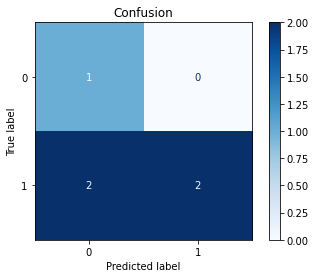

In [8]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"The accuracy is of: {accuracy}")

disp = metrics.plot_confusion_matrix(classification, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion')

plt.show()

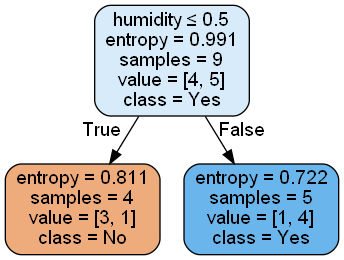

In [9]:
dot_data = StringIO()

export_graphviz(
    classification,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=data_columns,
    class_names=class_names
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


¿Cuál es la profundidad óptima del árbol?
Se puede observar la profundidad de este arbol de decision no quedan mas atributos, esta representado en la imagen se elige el atributo con mejor puntaje para seleccionarlo como atributo de separacion por eso nuestro nodo raiz sera el que tiene una entropia de 0.991 y despues vendran sus nodos los cuales daran como resultado valores nominales

¿Cuanta diferencia en la exactitud del resultado existe con los métodos de ganancia y gini?
Podemos observar que tenemos una exactitud del 60% de ganancia segun el calculo realizado para la construccion de matriz de confunsion.
